<a href="https://colab.research.google.com/github/giorginolab/lottery-clumping/blob/master/work_in_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
def mdistC(n=200, N=int(6e6), C=2):
  while True:
    w = np.sort(np.random.randint(1,N,n))
    if np.min(np.diff(w)) != 0:
      break
  wd = w-np.roll(w,C-1)
  wd = wd[(C-1):]
  m = np.min(wd)
  return m

In [0]:
R=1000
md = np.zeros([R],dtype=int)
for i in range(R): 
  md[i] = mdistC()

In [0]:
u=np.bincount(md) / R
cu = np.cumsum(u)

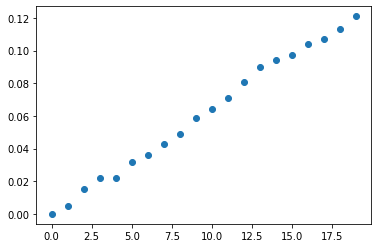

In [63]:
plt.plot(cu[0:20],'o')

In [0]:
R=10000000
md3 = np.zeros([R],dtype=int)
for i in range(R): 
  md3[i] = mdistC(C=3)

In [0]:
md3s = np.sort(md3)
D = np.arange(R)/R

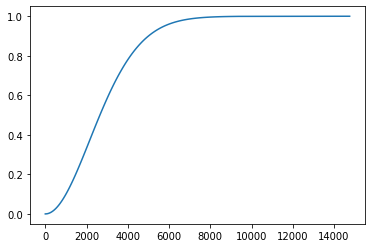

In [70]:
plt.plot(md3s,D)

Text(0, 0.5, 'Cumulative probability (x 10^6)')

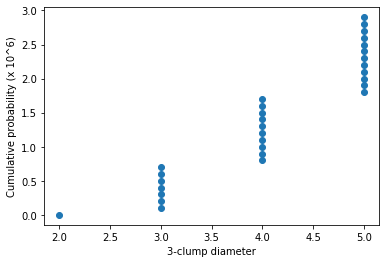

In [71]:
plt.plot(md3s[:30],D[:30] * 1e6,'o')
plt.xlabel("3-clump diameter")
plt.ylabel("Cumulative probability (x 10^6)")